In [10]:
import pandas as pd
#source={"manger":{"prs3":["mange"],"inf":["manger"]},"asseoir":{"prs3":["assoit","assied"],"inf":["asseoir"]}}
source=[["mange","prs3","manger",12000],
        ["asseoir","inf","asseoir",20000],
        ["manger","inf","manger",50000],
        ["asseoit","prs3","asseoir",5000],
        ["assied","prs3","asseoir",7500]
        ]
table=pd.DataFrame(source,columns=["ortho","case","lexeme","fréquence"])
pd.pivot_table(table,index=["lexeme"],columns=["case"],values=["ortho","fréquence"],aggfunc=lambda x: set(x))

ortho                             fréquence  \
case                inf                    prs3           inf   
lexeme                                                          
asseoir  set([asseoir])  set([asseoit, assied])  set([20000])   
manger    set([manger])            set([mange])  set([50000])   

                            
case                  prs3  
lexeme                      
asseoir  set([5000, 7500])  
manger        set([12000])

In [26]:
import re,codecs,math
textFile="./test.txt"
with codecs.open(textFile,"r",encoding="utf8") as input:
    text=input.readlines()
    

def countWords(text):
    wordFreq={}
    nbWords=0
    for line in text:
        chunks=line.split(" ")
        for chunk in chunks:
            m=re.findall(u"\w+",chunk,re.UNICODE)
            if m:
                for element in m:
                    word=element.lower()
                    if not word in wordFreq:
                        wordFreq[word]=0
                    wordFreq[word]+=1
                    nbWords+=1
    return (wordFreq,nbWords)

def calculateEntropy(freqDict,total):
    entropy=0
    nbElements=0
    for element in freqDict:
        p=float(freqDict[element])/total
        entropy-=p*math.log(p,2)
        nbElements+=1
    if nbElements==total:
        return entropy
    else:
        return calculateEntropy(freqDict,nbElements)
(wordFreq,nbWords)=countWords(text)
entropy=calculateEntropy(wordFreq,nbWords)
print entropy, entropy/math.log(nbWords,2)

wordList = ['the', 'the', 'the', 'a', 'a', 'over', 'love', 'one', 'tree']    
(wordFreq,nbWords)=countWords(wordList)
entropy=calculateEntropy(wordFreq,nbWords)
print entropy, entropy/math.log(nbWords,2)


34.3630722761 2.3612023712
2.75162916739 0.86804235625


In [12]:
i=0;exec"print i%3/2*'Fizz'+i%5/4*'Buzz'or-~i;i+=1;"*100

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


In [13]:
set([(1,2,3,4),(1,2,3,4),(1,2,3,4),(1,2,3,4),(1,2,3,4)])

{(1, 2, 3, 4)}

In [3]:
quad=[1,2,3,4]
tuple(quad)


(1, 2, 3, 4)

In [34]:
import unicodedata
liste=[]
s = u"ɔ̃w̃ɔtɨ"
comb=False
prec=u""
for char in s:
    if unicodedata.combining(char):
        liste.append(prec+char)
        prec=""
    else:
        liste.append(prec)
        prec=char
liste.append(prec)
print " ".join(liste)

 ɔ̃  w̃  ɔ t ɨ


In [6]:
import itertools as it
liste=[1,2,3,4,5]
list(it.product(liste,liste))

[(1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5)]

In [1]:
import igraph
igraph.draw([(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 2)])


ImportError: No module named igraph

In [18]:
import matplotlib.pyplot as plt

In [21]:
%matplotlib inline

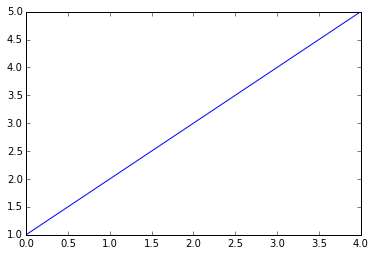

In [22]:
plt.plot(liste)

In [5]:
liste=[u"_ _ _ α _ _ _ _ _",
       u"_ _ _ _ _ _ _ β _ _ _ _ _ _ _ _ _ _ _ _",
       u"_ γ _ _ _ _ _ _ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ δ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ _ ε _ _ _ _",
       u"ζ _ _ _ _ _ _ _ _ _ _ _ _"]

for element in liste:
    mot=element.replace(" ","")
    print len(mot)


9
20
11
17
19
13


In [11]:
liste=[u"être au creux de la vague",
       u"extravagant",
       u"_ γ _ _ _ _ _ _ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ δ _ _ _",
       u"_ _ _ _ _ _ _ _ _ _ _ _ _ _ ε _ _ _ _",
       u"ζ _ _ _ _ _ _ _ _ _ _ _ _"]

for element in liste:
    mot=element.replace(" ","")
    print len(mot)


20
11
11
17
19
13


In [42]:
from lxml import etree
xmlData="""
            <Turn>
            <Sync />
            texte1
            <Event />
            <disfluence>
            blabla1
            </disfluence>
            <Event />
            texte2
            </Turn>
        """
root=etree.fromstring(xmlData.replace("\n",""))

In [53]:
for element in root.xpath("//Turn/text()"):
    print element

            
            texte1            
            
            
            texte2            


In [72]:
xmlTest='''
<Turn speaker="spk1 spk5" startTime="97.746" endTime="99.988">
<Sync time="97.746">
<Who nb="1"/>
deux trois ou quatre
<Who nb="2"/>

<Event desc="conv" type="noise" extent="instantaneous"/>

</Sync>
</Turn>
<Turn speaker="spk6" startTime="99.988" endTime="102.521">
<Sync time="99.988">

<Event desc="rire en fond" type="noise" extent="instantaneous"/>

</Sync>
</Turn>
'''

In [76]:
import re
essai = re.sub(r'<Who nb="2"/>(.*?)(</Sync>)',r'<Who nb="2">\1</Who>\2',xmlTest,flags=re.DOTALL)
#essai = re.search(re.escape('^(<Who nb="2"/>)'),xmlTest,flags=re.MULTILINE)
print essai


<Turn speaker="spk1 spk5" startTime="97.746" endTime="99.988">
<Sync time="97.746">
<Who nb="1"/>
deux trois ou quatre
<Who nb="2">

<Event desc="conv" type="noise" extent="instantaneous"/>

</Who></Sync>
</Turn>
<Turn speaker="spk6" startTime="99.988" endTime="102.521">
<Sync time="99.988">

<Event desc="rire en fond" type="noise" extent="instantaneous"/>

</Sync>
</Turn>



In [71]:
test='''a
b
c
d
'''
retest= re.sub("(b.*d)","\1",test, flags=re.DOTALL)
print retest


a




In [78]:
test=[
"b13135",
"ee7275",
"ca7074",
"d1afb0",
"561216",
"8b3338",
"997577",
"9d4d5a",
"ef123a",
"cd1234",
"b01231",
"cb3155",
"871132",
"e24e79",
"bc5176",
"ee8db0",
"d96e9b",
"72334e",
"edb1cf",
"cd8eb0",
"6e104a",
"a71774",
"ed8fce",
"c12d93",
"ad689b",
"4e3139",
"ce4fb9",
"92498a",
"4f0f4b",
"741172",
"753273",
"c971c6",
"eeb2ed",
"d2afd1",
"ed8eec",
"d091d0",
"efd3ef",
"f8e8f8",
"cf8fec",
"501270",
"8f50b5",
"332057",
"693e90",
"9c69ce",
"b18ed3",
"503074",
"ceb2ee",
"655874",
"b08ced",
"321173",
"120f1c",
"6e5ea6",
"5941c2",
"9a96ab",
"372fa8",
"6a67d9",
"b1b0ed",
"8989ce",
"b0b0d1",
"e8e8f8",
"0b0e74",
"303270",
"878aee",
"0c1047",
"0b25f0",
"344cf0",
"0b26d0",
"333839",
"0a25b0",
"cfd4ee",
"304ccb",
"0a2a90",
"364e89",
"0a51ee",
"3571f1",
"0a51d0",
"3a6ed0",
"0b316f",
"3e69b0",
"88b2ef",
"0a50b1",
"0b70f0",
"3690f2",
"d8e8f8",
"096fd0",
"0b4f90",
"5caaf0",
"0a2f4e",
"1d81d8",
"448fd1",
"b0d3ef",
"0b8fef",
"1d81c8",
"88b2cf",
"0888d8",
"0971af",
"1d98df",
"0888c8",
"1d82b8",
"34b2f0",
"6799b4",
"c8e8f8",
"0898d8",
"366e88",
"5cacd1",
"91d2ef",
"0b4f6b",
"3f90b1",
"0888b8",
"0db0ed",
"1d98c8",
"0898c8",
"0a6f91",
"18a8d8",
"1d80a2",
"08a8d8",
"71d1ee",
"0888a8",
"1d98b8",
"2fb1d0",
"08a8c8",
"0898b8",
"18b8d8",
"18a8c8",
"50d1ee",
"08b8d8",
"30d0ee",
"0eceec",
"0898a8",
"1da8b8",
"08c8d8",
"08b8c8",
"08a8b8",
"18c8d8",
"18b8c8",
"1d98a2",
"4ecbd2",
"31cfd5",
"70d0d3",
"91eff2",
"b1eff2",
"678889",
"098f91",
"0fedee",
"31edef",
"51edf0",
"71eef1",
"90d1d2",
"08d8d8",
"08c8c8",
"08b8b8",
"08a8a8",
"18d8d8",
"1fc8c6",
"1eb8b8",
"c8f8f8",
"b1d3d3",
"c8e8e8",
"d8f8f8",
"d8e8e8",
"e8f8f8",
"1ea8a4",
"40b6b3",
"0b736e",
"08d8c5",
"0bc8b8",
"3b948c",
"08bca7",
"0cead5",
"20d9c4",
"31ead4",
"51ead5",
"09ac92",
"20bda4",
"70ead4",
"68c1b2",
"0a4b3e",
"cfd4d3",
"91ead4",
"b2ebd4",
"c8f8e4",
"d8f8e8",
"a8c6b2",
"d3ead6",
"e8f8e8",
"cfecb4",
"e8f8d8",
"97a97b",
"e4f8c5",
"d4eb8d",
"f8f8c8",
"e8e8c8",
"f8f8d8",
"e8e8d8",
"f8f8e8",
"d3ce8f",
"f5ea8e",
"f5ecb1",
"d3cfb2",
"d3b10e",
"f4ce16",
"d3b430",
"f3d041",
"d2b551",
"9a7b28",
"f3d06a",
"f3af0d",
"675833",
"d2b571",
"d28f0d",
"f2b030",
"f3d190",
"f8e8c8",
"f2b051",
"f2900d",
"d28f31",
"d16f0e",
"f29030",
"f2b070",
"f2d2b0",
"f8e8d8",
"d08f51",
"d0af91",
"f2700d",
"f19150",
"d06f31",
"cf4f0d",
"f17130",
"f1b090",
"cf8f71",
"f2500d",
"8b310f",
"af4f2c",
"f09170",
"f0714f",
"cd6e51",
"b12f0f",
"f0320b",
"d02f0e",
"ef5130",
"d14e31",
"f0d2cf",
"f0100a",
"ce100b",
"f0b1af",
"b10e0c",
"8a0d0d",
"ed3432",
"ce322f",
"ee5251",
"c9504f",
"ef918f",
"080000",
"f8e8e8",
"f8f8f8",
"e8e8e8"
]

In [81]:
valeurs={"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"a":10,"b":11,"c":12,"d":13,"e":14,"f":15}
total=[0,0,0,0,0,0]
for element in test:
    for i in range(6):
        total[i]+=valeurs[element[i]]

In [106]:
for element in [item for sublist in [[x[i:i+2] for i in range(0, len(x), 2)] for x in test[30:]] for item in sublist]:
    print element,

75 32 73 c9 71 c6 ee b2 ed d2 af d1 ed 8e ec d0 91 d0 ef d3 ef f8 e8 f8 cf 8f ec 50 12 70 8f 50 b5 33 20 57 69 3e 90 9c 69 ce b1 8e d3 50 30 74 ce b2 ee 65 58 74 b0 8c ed 32 11 73 12 0f 1c 6e 5e a6 59 41 c2 9a 96 ab 37 2f a8 6a 67 d9 b1 b0 ed 89 89 ce b0 b0 d1 e8 e8 f8 0b 0e 74 30 32 70 87 8a ee 0c 10 47 0b 25 f0 34 4c f0 0b 26 d0 33 38 39 0a 25 b0 cf d4 ee 30 4c cb 0a 2a 90 36 4e 89 0a 51 ee 35 71 f1 0a 51 d0 3a 6e d0 0b 31 6f 3e 69 b0 88 b2 ef 0a 50 b1 0b 70 f0 36 90 f2 d8 e8 f8 09 6f d0 0b 4f 90 5c aa f0 0a 2f 4e 1d 81 d8 44 8f d1 b0 d3 ef 0b 8f ef 1d 81 c8 88 b2 cf 08 88 d8 09 71 af 1d 98 df 08 88 c8 1d 82 b8 34 b2 f0 67 99 b4 c8 e8 f8 08 98 d8 36 6e 88 5c ac d1 91 d2 ef 0b 4f 6b 3f 90 b1 08 88 b8 0d b0 ed 1d 98 c8 08 98 c8 0a 6f 91 18 a8 d8 1d 80 a2 08 a8 d8 71 d1 ee 08 88 a8 1d 98 b8 2f b1 d0 08 a8 c8 08 98 b8 18 b8 d8 18 a8 c8 50 d1 ee 08 b8 d8 30 d0 ee 0e ce ec 08 98 a8 1d a8 b8 08 c8 d8 08 b8 c8 08 a8 b8 18 c8 d8 18 b8 c8 1d 98 a2 4e cb d2 31 cf d5 70 d0 d3 91 ef f2 b1 ef f2 6

In [98]:
webcolors.css3_hex_to_names

{'#000000': 'black',
 '#000080': 'navy',
 '#00008b': 'darkblue',
 '#0000cd': 'mediumblue',
 '#0000ff': 'blue',
 '#006400': 'darkgreen',
 '#008000': 'green',
 '#008080': 'teal',
 '#008b8b': 'darkcyan',
 '#00bfff': 'deepskyblue',
 '#00ced1': 'darkturquoise',
 '#00fa9a': 'mediumspringgreen',
 '#00ff00': 'lime',
 '#00ff7f': 'springgreen',
 '#00ffff': 'aqua',
 '#191970': 'midnightblue',
 '#1e90ff': 'dodgerblue',
 '#20b2aa': 'lightseagreen',
 '#228b22': 'forestgreen',
 '#2e8b57': 'seagreen',
 '#2f4f4f': 'darkslategray',
 '#32cd32': 'limegreen',
 '#3cb371': 'mediumseagreen',
 '#40e0d0': 'turquoise',
 '#4169e1': 'royalblue',
 '#4682b4': 'steelblue',
 '#483d8b': 'darkslateblue',
 '#48d1cc': 'mediumturquoise',
 '#4b0082': 'indigo',
 '#556b2f': 'darkolivegreen',
 '#5f9ea0': 'cadetblue',
 '#6495ed': 'cornflowerblue',
 '#66cdaa': 'mediumaquamarine',
 '#696969': 'dimgrey',
 '#6a5acd': 'slateblue',
 '#6b8e23': 'olivedrab',
 '#708090': 'slategray',
 '#778899': 'lightslategrey',
 '#7b68ee': 'mediumslat

In [87]:
for element in sorted(test):
    print element

080000
0888a8
0888b8
0888c8
0888d8
0898a8
0898b8
0898c8
0898d8
08a8a8
08a8b8
08a8c8
08a8d8
08b8b8
08b8c8
08b8d8
08bca7
08c8c8
08c8d8
08d8c5
08d8d8
096fd0
0971af
098f91
09ac92
0a25b0
0a2a90
0a2f4e
0a4b3e
0a50b1
0a51d0
0a51ee
0a6f91
0b0e74
0b25f0
0b26d0
0b316f
0b4f6b
0b4f90
0b70f0
0b736e
0b8fef
0bc8b8
0c1047
0cead5
0db0ed
0eceec
0fedee
120f1c
18a8c8
18a8d8
18b8c8
18b8d8
18c8d8
18d8d8
1d80a2
1d81c8
1d81d8
1d82b8
1d98a2
1d98b8
1d98c8
1d98df
1da8b8
1ea8a4
1eb8b8
1fc8c6
20bda4
20d9c4
2fb1d0
303270
304ccb
30d0ee
31cfd5
31ead4
31edef
321173
332057
333839
344cf0
34b2f0
3571f1
364e89
366e88
3690f2
372fa8
3a6ed0
3b948c
3e69b0
3f90b1
40b6b3
448fd1
4e3139
4ecbd2
4f0f4b
501270
503074
50d1ee
51ead5
51edf0
561216
5941c2
5caaf0
5cacd1
655874
675833
678889
6799b4
68c1b2
693e90
6a67d9
6e104a
6e5ea6
70d0d3
70ead4
71d1ee
71eef1
72334e
741172
753273
871132
878aee
88b2cf
88b2ef
8989ce
8a0d0d
8b310f
8b3338
8f50b5
90d1d2
91d2ef
91ead4
91eff2
92498a
97a97b
997577
9a7b28
9a96ab
9c69ce
9d4d5a
a71774
a8c6b2
ad689b

In [1]:
from IPython.lib import passwd
passwd()

Enter password: ········
Verify password: ········


'sha1:f7e5bb2a8019:a5e6692551812aaeed990a06c45a59f51d933cde'

In [10]:
import itertools
def calculation(n):
    result=(n[0]+13*n[1]/n[2]+n[3]+12*n[4]-n[5]-11+n[6]*n[7]/n[8]-10)
    if result==66:
        return n
    else:
        return []

In [11]:
num=1
for n in itertools.permutations(xrange(1,10)):
    if n[1]%n[2]==0 and n[6]*n[7]%n[8]==0:
        order=calculation(n)
        if order:
            print num, order
            num+=1

1 (3, 2, 1, 5, 4, 7, 8, 9, 6)
2 (3, 2, 1, 5, 4, 7, 9, 8, 6)
3 (5, 2, 1, 3, 4, 7, 8, 9, 6)
4 (5, 2, 1, 3, 4, 7, 9, 8, 6)
5 (5, 3, 1, 7, 2, 6, 8, 9, 4)
6 (5, 3, 1, 7, 2, 6, 9, 8, 4)
7 (5, 4, 1, 9, 2, 7, 3, 8, 6)
8 (5, 4, 1, 9, 2, 7, 8, 3, 6)
9 (5, 9, 3, 6, 2, 1, 7, 8, 4)
10 (5, 9, 3, 6, 2, 1, 8, 7, 4)
11 (6, 3, 1, 9, 2, 5, 7, 8, 4)
12 (6, 3, 1, 9, 2, 5, 8, 7, 4)
13 (6, 9, 3, 5, 2, 1, 7, 8, 4)
14 (6, 9, 3, 5, 2, 1, 8, 7, 4)
15 (7, 3, 1, 5, 2, 6, 8, 9, 4)
16 (7, 3, 1, 5, 2, 6, 9, 8, 4)
17 (9, 3, 1, 6, 2, 5, 7, 8, 4)
18 (9, 3, 1, 6, 2, 5, 8, 7, 4)
19 (9, 4, 1, 5, 2, 7, 3, 8, 6)
20 (9, 4, 1, 5, 2, 7, 8, 3, 6)
